# Example Data Science Project

This jupyter notebook is complimentary to another [post](http://github.com) about reorganizing your notebook for a better presentation.

#### import libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

#### Data

Create a simple data frame for the example

In [53]:
dt_range= pd.date_range('2018-01-01',periods=36,freq='M')
df=pd.DataFrame({'Date':dt_range,'Val':np.random.randn(len(dt_range))})
df.head()

,Date,Val
0,2018-01-31,1.157431
1,2018-02-28,0.408311
2,2018-03-31,0.491233
3,2018-04-30,2.990554
4,2018-05-31,0.557509


#### Data Manipulation & Visualization 

Lets create a column with the year, and then filter the data to include anything after 2018. Finally graph the results.

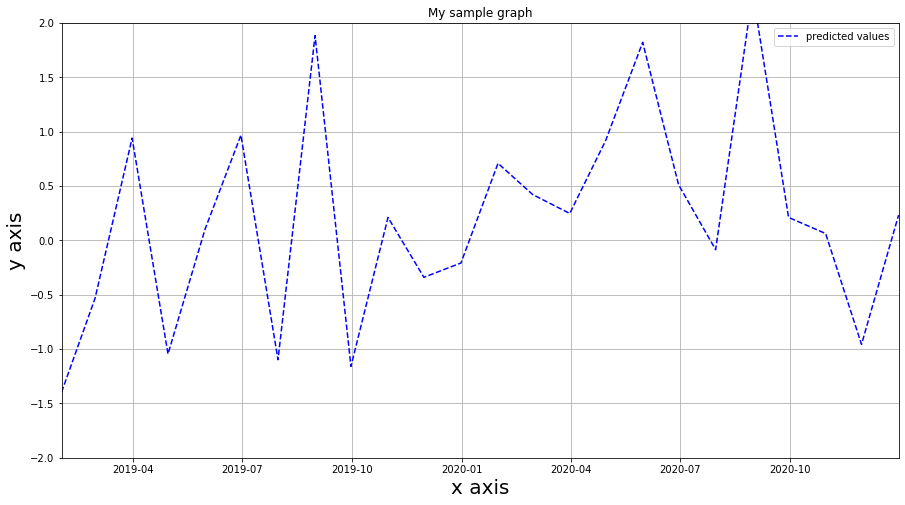

In [54]:
# Create a Year variable
df['year']=df['Date'].dt.year
#filter my data
prec_data=df[df['year']>2018].reset_index()
#rename my columns
prec_data.rename(columns={"Val":"predicted value"},inplace=True)

# Graph the predicted values and Date

#call fig
fig=plt.figure()
#size of graph
plt.rcParams["figure.figsize"]=(15,8)
plt.ticklabel_format(axis="x",style="plain")
#axis limits
ax=plt.axes(xlim=(prec_data['Date'][0],prec_data['Date'].iloc[-1]), ylim=(-2,2))
#line
line,=ax.plot(prec_data['Date'],prec_data['predicted value'],color='blue',linestyle='dashed',label='predicted values')
#other options
plt.legend()
plt.grid()
plt.title('My sample graph')
plt.xlabel('x axis',fontsize=20)
plt.ylabel('y axis',fontsize=20)
plt.show()

#### Data & Visualization ( Better Approach)

Below is a sample of one of the functions that will be save on a notepad as a **.py** file.

In [ ]:
#create year column
def create_yr(data, colname):
    """
        Function
        ----------
        Creates a new column called year, after extracting the year from a date column
        
        Parameters
        ----------
        data : DataFrame
            The dataframe
        colname: date
            Date column in the dataframe
    """
    data['year']=data[colname].dt.year
    return data

Once all the functions are save as a .py file, we can execute that script. I placed the .py in the same folder as the current directory (you can also explicitly write out the whole path).

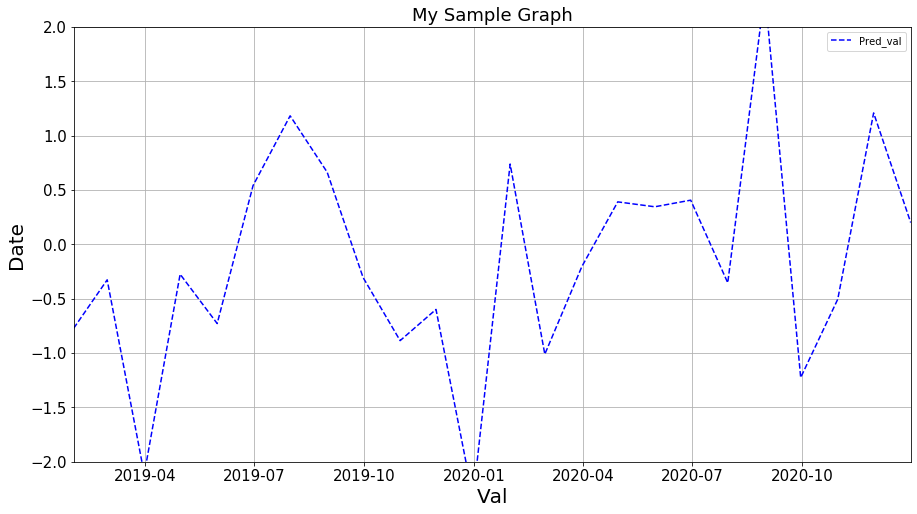

In [52]:
#run the python script with the save functions
%run ./function_call.py
# manipulate data & create plot
prec_data=(df
           .pipe(create_yr,'Date')
           .pipe(filtering,'year',2018,'greater')
           .pipe(rename_col,'Val','predicted value')
           .pipe(simple_plot,'predicted value','Date','Pred_val','My Sample Graph','Date','Val',-2,2)
)

#### What is in my script ?

Run the following code, to load the entire script into your notebook.

In [ ]:
%load ./function_call.py